In [31]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datasets

In [32]:
data = {}
sanity_data = {}
train_dataset_names = ["tekgen", "trex", "kelm"]
for name in train_dataset_names:
    data[name] = datasets.load_dataset("json", data_files=f"../raw_data/{name}_inverted_rdfs_len_1.jsonl", split="train")
    sanity_data[name] = data[name].shuffle().select(range(2000))
test_dataset_names = ["genwiki", "wikichunks", "webnlg"]
for name in test_dataset_names:
    data[name] = datasets.load_dataset("json", data_files=f"../raw_data/{name}_inverted_rdfs_len_1.jsonl", split="train")
    sanity_data[name] = data[name].shuffle().select(range(2000))

Using custom data configuration default-677c5a1f7384d958
Reusing dataset json (/home/teven/.cache/huggingface/datasets/json/default-677c5a1f7384d958/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)
Using custom data configuration default-9bdfabaed13a467e
Reusing dataset json (/home/teven/.cache/huggingface/datasets/json/default-9bdfabaed13a467e/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)
Using custom data configuration default-5656d52b342fca20
Reusing dataset json (/home/teven/.cache/huggingface/datasets/json/default-5656d52b342fca20/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)
Using custom data configuration default-085fbafa72ffe9bb
Reusing dataset json (/home/teven/.cache/huggingface/datasets/json/default-085fbafa72ffe9bb/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)
Using custom data configuration default-80ea7eada3ab1091
Reusing dataset json (/home/teven/.cache/huggingface/datase

In [54]:
def similarity_plot(dataset_name, axes, sanity=False, upper_bound=14):
    ax = axes[dataset_name]
    if sanity:
        plot_data = sanity_data
    else:
        plot_data = data
    ax.set_xlim([0, 1])
    ax.set_ylim([0, upper_bound])
    ax.hist(plot_data[dataset_name]["similarity"], color = 'blue', edgecolor = 'black', bins = 100, density=True)
    ax.set_title(dataset_name, fontsize=21)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)   
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)      
    xticks = ax.get_xticks()
    ax.tick_params(axis=u'both', which=u'both',length=0)
    for x_pos in xticks:
        ax.axvline(x_pos, color="black", alpha=0.15)
    ax.set_xlabel('Similarity score', fontsize=15)
    ax.set_ylabel('Density', fontsize=15)
    ax.set_yticklabels([])

Text(0.5, 0.98, 'Distribution of similarity on training datasets')

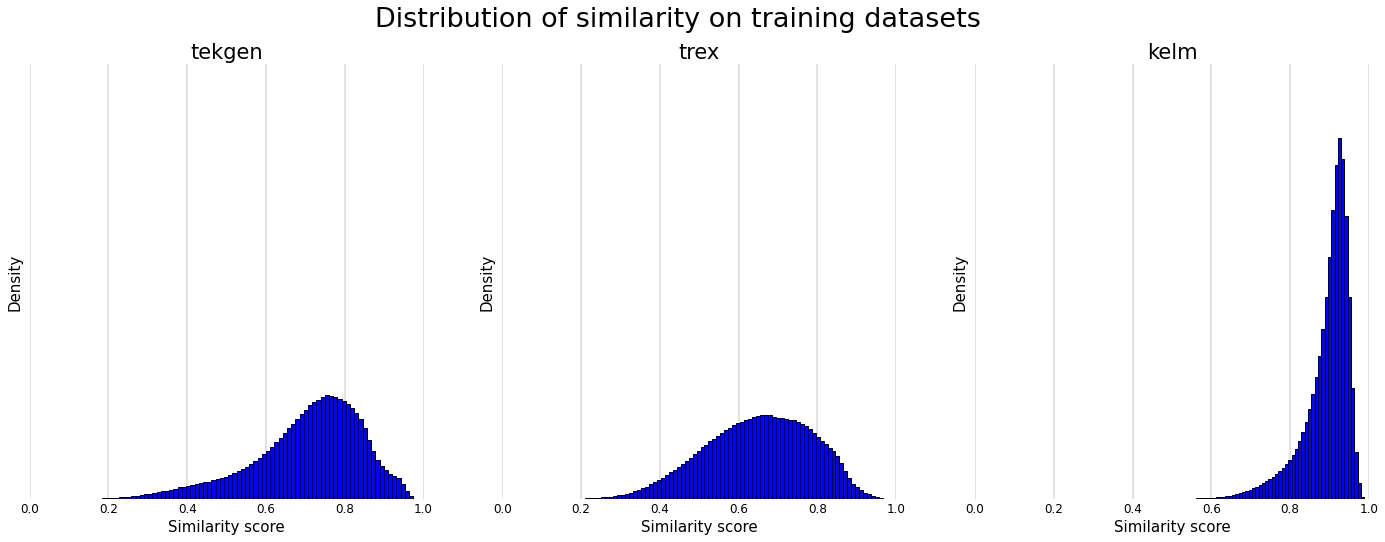

In [60]:
train_axes = {}
fig, (train_axes["tekgen"], train_axes["trex"], train_axes["kelm"]) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
    
for name in train_dataset_names:
    similarity_plot(name, train_axes, sanity=False)
    
fig.suptitle('Distribution of similarity on training datasets', fontsize=27)

Text(0.5, 0.98, 'Distribution of similarity on evaluation datasets')

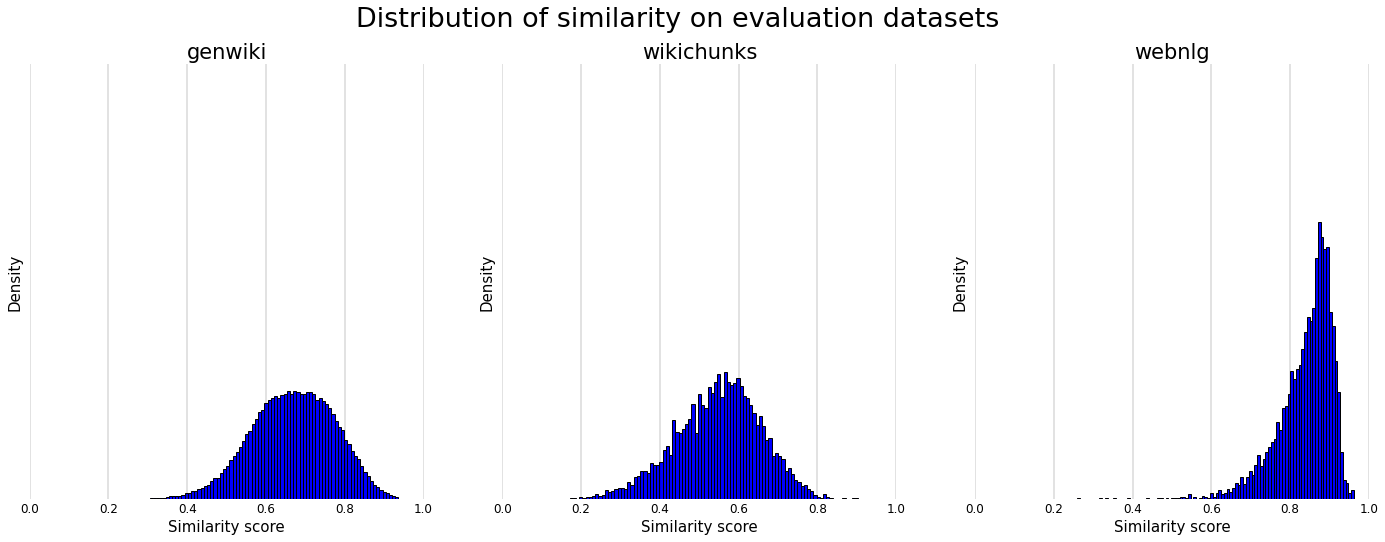

In [61]:
test_axes = {}
fig, (test_axes["genwiki"], test_axes["wikichunks"], test_axes["webnlg"]) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
    
for name in test_dataset_names:
    similarity_plot(name, test_axes, sanity=False)
    
fig.suptitle('Distribution of similarity on evaluation datasets', fontsize=27)